#**Dealing with Data - Words Significance Impact on Stock Price**


We aim to build an analyst pattern that can provide stock transaction suggestions to analysts through analyzing related information from some major social media platforms. In this project, we will choose several stocks in different industries to analyze. We plan to import the historical stock prices data and catch significant meaningful words from major social media platforms to build a model which can see how those words influence the short term trend of stock price.

#Project Description

In the first step, we plan to perform the text mining on Twitter, to pull raw texting data. Meanwhile, stock price will be collected through Yahoo Finance. In the second step, a couple of data cleaning will be conducted to avoid duplicates, remove neutral words such as stop words, and take out articles that don’t specifically focus on our stocks. After completing cleaning, we will move onto the third step to tokenize each word and assign the value for each of them by using the natural language processing package. The value of each word is used for correlation analysis between them and stock price. In addition, we are going to run a statistical model as well to test the significance of the impact of words on stock price. Lastly, we would like to present some visual charts for people to better understand the relationship between two variables followed by our conclusion.

# Project Methodologies

In order to accomplish the accurate prediction of word significance influence, we would need to import all related articles from yahoo.com/finance with on-time update through API import and mysql server. Also we will bring in the natural_language_understanding/api from Watson to analyze and value those meaningful words and their sentiments. We will also create the visualization of the coorelation of the sentiment score versus the stock price changes. 

Libraries we referred to:
 - pandas
 - matplotlib
 - numpy
 - sqlalchemy
 - tweepy
 - datetime
 - nltk

# Data Preparation

##Import MySQL to Python

In [ ]:
pip install -U sql_magic


In [ ]:
pip install mysqlclient

     |████████████████████████████████| 92kB 3.8MB/s 
  Created wheel for mysqlclient: filename=mysqlclient-2.0.3-cp37-cp37m-linux_x86_64.whl size=100093 sha256=5e9a98711753bbf3a21da4aacdd5a7632bef816d5c12d216e304cb77e841524f
  Stored in directory: /root/.cache/pip/wheels/75/ca/e8/ad4e7ce3df18bcd91c7d84dd28c7c08db491a2a2360efed363
Successfully built mysqlclient


In [ ]:
from sqlalchemy import create_engine

In [ ]:
conn_string = 'mysql://{user}:{password}@{host}/?charset=utf8'.format(
    host = 'bigdata.stern.nyu.edu',
    user = 'DealingS21GB10',
    password = 'DealingS21GB10!!',
    encoding = 'utf-8')
engine_stock = create_engine(conn_string)

In [ ]:
%reload_ext sql_magic

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
%config SQL.conn_name = 'engine_stock'

In [ ]:
%%read_sql
show databases

Query started at 12:57:48 AM UTC; Query executed in 0.02 m

,Database
0,information_schema
1,DealingS21
2,DealingS21GB10


In [ ]:
%%read_sql
use DealingS21GB10

Query started at 12:57:49 AM UTC; Query executed in 0.00 m

In [ ]:
%%read_sql
show tables

Query started at 12:57:49 AM UTC; Query executed in 0.00 m

,Tables_in_DealingS21GB10
0,stock_text
1,tweet_sentiment


In [ ]:
%%read_sql
select *
from stock_text

Query started at 12:57:49 AM UTC; Query executed in 0.00 m

,date,all,bac,ci,cost,dal,hsy,jnj,ms,pfe,save,trv,wmt
0,2021-04-01,116.03,39.49,241.83,354.181,48.83,158.76,162.83,77.8891,36.30,37.36,150.62,135.62
1,2021-04-05,117.49,39.80,243.34,360.049,50.25,159.35,163.43,77.6700,36.28,37.49,152.03,139.43
2,2021-04-06,117.83,39.69,239.13,359.350,51.65,160.76,163.39,78.7554,36.05,38.29,151.75,140.10
3,2021-04-07,116.38,40.05,240.22,358.043,50.20,160.57,163.61,78.7056,35.91,37.53,152.29,139.80
4,2021-04-08,117.05,39.70,238.25,360.448,49.81,160.11,162.97,79.8607,35.96,37.67,150.36,139.71
5,2021-04-09,117.10,39.99,246.10,362.434,49.27,159.50,161.25,80.3785,36.60,37.23,151.65,139.78
6,2021-04-12,119.36,40.06,245.82,364.030,48.82,159.60,161.64,79.8408,36.97,36.01,151.84,139.80
7,2021-04-13,119.19,39.32,245.26,364.429,48.26,158.82,159.48,79.1935,37.16,37.04,152.21,139.37
8,2021-04-14,120.42,39.88,249.44,362.394,48.17,158.19,159.92,80.4482,37.17,37.28,155.43,139.32
9,2021-04-15,121.59,38.74,254.36,368.012,46.82,160.90,160.39,80.4781,37.60,37.16,154.36,140.16


##Migrate SQL table to Pandas

In [ ]:
!sudo apt-get install -y python-dev libmysqlclient-dev && sudo pip install mysqlclient

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-dev is already the newest version (2.7.15~rc1-1).
libmysqlclient-dev is already the newest version (5.7.33-0ubuntu0.18.04.1).
libmysqlclient-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib
import numpy as np
import requests
import matplotlib.pyplot as plt

matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])
plt.rcParams['figure.figsize'] = (15, 5)

In [ ]:
!sudo -H pip3 install -U sqlalchemy

     |████████████████████████████████| 1.5MB 6.5MB/s 
  Found existing installation: SQLAlchemy 1.4.7
    Uninstalling SQLAlchemy-1.4.7:
      Successfully uninstalled SQLAlchemy-1.4.7


In [ ]:
query = '''select * from stock_text'''

In [ ]:
df_stock = pd.read_sql(query, con=engine_stock)
pd.set_option('display.max_rows', None)

In [ ]:
df_stock

,date,all,bac,ci,cost,dal,hsy,jnj,ms,pfe,save,trv,wmt
0,2021-04-01,116.03,39.49,241.83,354.181,48.83,158.76,162.83,77.8891,36.30,37.36,150.62,135.62
1,2021-04-05,117.49,39.80,243.34,360.049,50.25,159.35,163.43,77.6700,36.28,37.49,152.03,139.43
2,2021-04-06,117.83,39.69,239.13,359.350,51.65,160.76,163.39,78.7554,36.05,38.29,151.75,140.10
3,2021-04-07,116.38,40.05,240.22,358.043,50.20,160.57,163.61,78.7056,35.91,37.53,152.29,139.80
4,2021-04-08,117.05,39.70,238.25,360.448,49.81,160.11,162.97,79.8607,35.96,37.67,150.36,139.71
5,2021-04-09,117.10,39.99,246.10,362.434,49.27,159.50,161.25,80.3785,36.60,37.23,151.65,139.78
6,2021-04-12,119.36,40.06,245.82,364.030,48.82,159.60,161.64,79.8408,36.97,36.01,151.84,139.80
7,2021-04-13,119.19,39.32,245.26,364.429,48.26,158.82,159.48,79.1935,37.16,37.04,152.21,139.37
8,2021-04-14,120.42,39.88,249.44,362.394,48.17,158.19,159.92,80.4482,37.17,37.28,155.43,139.32
9,2021-04-15,121.59,38.74,254.36,368.012,46.82,160.90,160.39,80.4781,37.60,37.16,154.36,140.16


In [ ]:
df_stock.dtypes

date     object
all     float64
bac     float64
ci      float64
cost    float64
dal     float64
hsy     float64
jnj     float64
ms      float64
pfe     float64
save    float64
trv     float64
wmt     float64
dtype: object

## Calculate price change and expand the dataframe

In [ ]:
#table Calculation
df_stock["all(%)"] = df_stock["all"].diff(+1)/df_stock["all"]
df_stock["bac(%)"] = df_stock["bac"].diff(+1)/df_stock["bac"]
df_stock["ci(%)"] = df_stock["ci"].diff(+1)/df_stock["ci"]
df_stock["cost(%)"] = df_stock["cost"].diff(+1)/df_stock["cost"]
df_stock["dal(%)"] = df_stock["dal"].diff(+1)/df_stock["dal"]
df_stock["hsy(%)"] = df_stock["hsy"].diff(+1)/df_stock["hsy"]
df_stock["jnj(%)"] = df_stock["jnj"].diff(+1)/df_stock["jnj"]
df_stock["ms(%)"] = df_stock["ms"].diff(+1)/df_stock["ms"]
df_stock["pfe(%)"] = df_stock["pfe"].diff(+1)/df_stock["pfe"]
df_stock["save(%)"] = df_stock["save"].diff(+1)/df_stock["save"]
df_stock["trv(%)"] = df_stock["trv"].diff(+1)/df_stock["trv"]
df_stock["wmt(%)"] = df_stock["wmt"].diff(+1)/df_stock["wmt"]

df_stock["Travel"] = (df_stock["dal"]+df_stock["save"]+df_stock["trv"])/3
df_stock["Pharmaseutical"] = (df_stock["ci"]+df_stock["jnj"]+df_stock["pfe"])/3
df_stock["Consumer_Staple"] = (df_stock["cost"]+df_stock["jnj"]+df_stock["wmt"])/3
df_stock["Financial_Service"] = (df_stock["all"]+df_stock["ms"]+df_stock["bac"])/3

df_stock["Travel(%)"] = (df_stock["dal"].diff(+1)+df_stock["save"].diff(+1)+df_stock["trv"].diff(+1))/(df_stock["dal"]+df_stock["save"]+df_stock["trv"])
df_stock["Pharmaceutical(%)"] = (df_stock["ci"].diff(+1)+df_stock["jnj"].diff(+1)+df_stock["pfe"].diff(+1))/(df_stock["ci"]+df_stock["jnj"]+df_stock["pfe"])
df_stock["Consumer_Staple(%)"] = (df_stock["cost"].diff(+1)+df_stock["hsy"].diff(+1)+df_stock["wmt"].diff(+1))/(df_stock["cost"]+df_stock["hsy"]+df_stock["wmt"])
df_stock["Financial_Service(%)"] = (df_stock["all"].diff(+1)+df_stock["ms"].diff(+1)+df_stock["bac"].diff(+1))/(df_stock["all"]+df_stock["ms"]+df_stock["bac"])

df_stock

,date,all,bac,ci,cost,dal,hsy,jnj,ms,pfe,save,trv,wmt,all(%),bac(%),ci(%),cost(%),dal(%),hsy(%),jnj(%),ms(%),pfe(%),save(%),trv(%),wmt(%),Travel,Pharmaseutical,Consumer_Staple,Financial_Service,Travel(%),Pharmaceutical(%),Consumer_Staple(%),Financial_Service(%)
0,2021-04-01,116.03,39.49,241.83,354.181,48.83,158.76,162.83,77.8891,36.30,37.36,150.62,135.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.936667,146.986667,217.543667,77.803033,NaN,NaN,NaN,NaN
1,2021-04-05,117.49,39.80,243.34,360.049,50.25,159.35,163.43,77.6700,36.28,37.49,152.03,139.43,0.012427,0.007789,0.006205,0.016298,0.028259,0.003703,0.003671,-0.002821,-0.000551,0.003468,0.009274,0.027326,79.923333,147.683333,220.969667,78.320000,0.012345,0.004717,0.015585,0.006601
2,2021-04-06,117.83,39.69,239.13,359.350,51.65,160.76,163.39,78.7554,36.05,38.29,151.75,140.10,0.002886,-0.002771,-0.017605,-0.001945,0.027106,0.008771,-0.000245,0.013782,-0.006380,0.020893,-0.001845,0.004782,80.563333,146.190000,220.946667,78.758467,0.007944,-0.010215,0.002092,0.005567
3,2021-04-07,116.38,40.05,240.22,358.043,50.20,160.57,163.61,78.7056,35.91,37.53,152.29,139.80,-0.012459,0.008989,0.004538,-0.003650,-0.028884,-0.001183,0.001345,-0.000633,-0.003899,-0.020250,0.003546,-0.002146,80.006667,146.580000,220.484333,78.378533,-0.006958,0.002661,-0.002729,-0.004847
4,2021-04-08,117.05,39.70,238.25,360.448,49.81,160.11,162.97,79.8607,35.96,37.67,150.36,139.71,0.005724,-0.008816,-0.008269,0.006672,-0.007830,-0.002873,-0.003927,0.014464,0.001390,0.003716,-0.012836,-0.000644,79.280000,145.726667,221.042667,78.870233,-0.009166,-0.005856,0.002809,0.006234
5,2021-04-09,117.10,39.99,246.10,362.434,49.27,159.50,161.25,80.3785,36.60,37.23,151.65,139.78,0.000427,0.007252,0.031898,0.005480,-0.010960,-0.003824,-0.010667,0.006442,0.017486,-0.011818,0.008506,0.000501,79.383333,147.983333,221.154667,79.156167,0.001302,0.015249,0.002185,0.003612
6,2021-04-12,119.36,40.06,245.82,364.030,48.82,159.60,161.64,79.8408,36.97,36.01,151.84,139.80,0.018934,0.001747,-0.001139,0.004384,-0.009218,0.000627,0.002413,-0.006735,0.010008,-0.033879,0.001251,0.000143,78.890000,148.143333,221.823333,79.753600,-0.006253,0.001080,0.002587,0.007491
7,2021-04-13,119.19,39.32,245.26,364.429,48.26,158.82,159.48,79.1935,37.16,37.04,152.21,139.37,-0.001426,-0.018820,-0.002283,0.001095,-0.011604,-0.004911,-0.013544,-0.008174,0.005113,0.027808,0.002431,-0.003085,79.170000,147.300000,221.093000,79.234500,0.003537,-0.005725,-0.001224,-0.006551
8,2021-04-14,120.42,39.88,249.44,362.394,48.17,158.19,159.92,80.4482,37.17,37.28,155.43,139.32,0.010214,0.014042,0.016758,-0.005615,-0.001868,-0.003983,0.002751,0.015596,0.000269,0.006438,0.020717,-0.000359,80.293333,148.843333,220.544667,80.249400,0.013990,0.010369,-0.004114,0.012647
9,2021-04-15,121.59,38.74,254.36,368.012,46.82,160.90,160.39,80.4781,37.60,37.16,154.36,140.16,0.009623,-0.029427,0.019343,0.015266,-0.028834,0.016843,0.002930,0.000372,0.011436,-0.003229,-0.006932,0.005993,79.446667,150.783333,222.854000,80.269367,-0.010657,0.012866,0.013703,0.000249


In [ ]:
#Date re-format
import datetime

In [ ]:
for i in df_stock['date']:
  d1 = datetime.datetime.strptime(str(i), '%Y-%m-%d').strftime('%Y-%m-%d')
  #d2 = datetime.datetime.strptime(str(i), '%Y-%m-%d').strftime('%a %b %d %H:%M:%S %z %Y')
  #d1 = datetime.datetime.strptime(str(i), '%a-%b-%d-%X-%z-%Y')
  df_stock['date_formatted'] = d1
  print(d1)

  #Mon Apr 26 23:57:05 +0000 2021	0

2021-04-01
2021-04-05
2021-04-06
2021-04-07
2021-04-08
2021-04-09
2021-04-12
2021-04-13
2021-04-14
2021-04-15
2021-04-16
2021-04-19
2021-04-20
2021-04-21
2021-04-22
2021-04-23
2021-04-26
2021-04-27
2021-04-28
2021-04-29


In [ ]:
df_stock_nodate=df_stock.drop(['date'], axis = 1, inplace = False)
df_stock
df_stock_nodate

,all,bac,ci,cost,dal,hsy,jnj,ms,pfe,save,trv,wmt,all(%),bac(%),ci(%),cost(%),dal(%),hsy(%),jnj(%),ms(%),pfe(%),save(%),trv(%),wmt(%),Travel,Pharmaseutical,Consumer_Staple,Financial_Service,Travel(%),Pharmaceutical(%),Consumer_Staple(%),Financial_Service(%),date_formatted
0,116.03,39.49,241.83,354.181,48.83,158.76,162.83,77.8891,36.30,37.36,150.62,135.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.936667,146.986667,217.543667,77.803033,NaN,NaN,NaN,NaN,2021-04-29
1,117.49,39.80,243.34,360.049,50.25,159.35,163.43,77.6700,36.28,37.49,152.03,139.43,0.012427,0.007789,0.006205,0.016298,0.028259,0.003703,0.003671,-0.002821,-0.000551,0.003468,0.009274,0.027326,79.923333,147.683333,220.969667,78.320000,0.012345,0.004717,0.015585,0.006601,2021-04-29
2,117.83,39.69,239.13,359.350,51.65,160.76,163.39,78.7554,36.05,38.29,151.75,140.10,0.002886,-0.002771,-0.017605,-0.001945,0.027106,0.008771,-0.000245,0.013782,-0.006380,0.020893,-0.001845,0.004782,80.563333,146.190000,220.946667,78.758467,0.007944,-0.010215,0.002092,0.005567,2021-04-29
3,116.38,40.05,240.22,358.043,50.20,160.57,163.61,78.7056,35.91,37.53,152.29,139.80,-0.012459,0.008989,0.004538,-0.003650,-0.028884,-0.001183,0.001345,-0.000633,-0.003899,-0.020250,0.003546,-0.002146,80.006667,146.580000,220.484333,78.378533,-0.006958,0.002661,-0.002729,-0.004847,2021-04-29
4,117.05,39.70,238.25,360.448,49.81,160.11,162.97,79.8607,35.96,37.67,150.36,139.71,0.005724,-0.008816,-0.008269,0.006672,-0.007830,-0.002873,-0.003927,0.014464,0.001390,0.003716,-0.012836,-0.000644,79.280000,145.726667,221.042667,78.870233,-0.009166,-0.005856,0.002809,0.006234,2021-04-29
5,117.10,39.99,246.10,362.434,49.27,159.50,161.25,80.3785,36.60,37.23,151.65,139.78,0.000427,0.007252,0.031898,0.005480,-0.010960,-0.003824,-0.010667,0.006442,0.017486,-0.011818,0.008506,0.000501,79.383333,147.983333,221.154667,79.156167,0.001302,0.015249,0.002185,0.003612,2021-04-29
6,119.36,40.06,245.82,364.030,48.82,159.60,161.64,79.8408,36.97,36.01,151.84,139.80,0.018934,0.001747,-0.001139,0.004384,-0.009218,0.000627,0.002413,-0.006735,0.010008,-0.033879,0.001251,0.000143,78.890000,148.143333,221.823333,79.753600,-0.006253,0.001080,0.002587,0.007491,2021-04-29
7,119.19,39.32,245.26,364.429,48.26,158.82,159.48,79.1935,37.16,37.04,152.21,139.37,-0.001426,-0.018820,-0.002283,0.001095,-0.011604,-0.004911,-0.013544,-0.008174,0.005113,0.027808,0.002431,-0.003085,79.170000,147.300000,221.093000,79.234500,0.003537,-0.005725,-0.001224,-0.006551,2021-04-29
8,120.42,39.88,249.44,362.394,48.17,158.19,159.92,80.4482,37.17,37.28,155.43,139.32,0.010214,0.014042,0.016758,-0.005615,-0.001868,-0.003983,0.002751,0.015596,0.000269,0.006438,0.020717,-0.000359,80.293333,148.843333,220.544667,80.249400,0.013990,0.010369,-0.004114,0.012647,2021-04-29
9,121.59,38.74,254.36,368.012,46.82,160.90,160.39,80.4781,37.60,37.16,154.36,140.16,0.009623,-0.029427,0.019343,0.015266,-0.028834,0.016843,0.002930,0.000372,0.011436,-0.003229,-0.006932,0.005993,79.446667,150.783333,222.854000,80.269367,-0.010657,0.012866,0.013703,0.000249,2021-04-29


##Twitter using Tweepy

In [ ]:
!pip3 install -U tweepy
#!pip3 install xlsxwriter

Requirement already up-to-date: tweepy in /usr/local/lib/python3.7/dist-packages (3.10.0)


In [ ]:
import tweepy
import sys, datetime
# Let's define again consumer and access keys and secrets for getting access to Twitter API through your application
consumer_key = 'ZFSlBaBhgAnoI5Cb5YJ8Q2iSL'
consumer_secret = 'QBFuxdiXsGypn1fEL3Nu8BQtYiFXC97RIsaCf6xv7Rq7E4Dcyg'
access_token = '16976496-hhbdqyfoVqgYbFmVz076IwWxa4vM58my0v1nJNlW0'
access_secret = '3aTWUUdNMTVWDBjxCOApzRdSiiySFM4yaZcGJ1YYaub75'

# Then you need authenticate yourself
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)
print(api)

In [ ]:
# If the authentication was successful, you should see the name of the account print(out)
print("My name is", api.me().name)

My name is Panos Ipeirotis


###Test Tweepy Code

In [ ]:
#source:https://stackoverflow.com/questions/61725154/how-do-i-pull-tweets-from-a-user-for-specific-dates-on-python
import tweepy
import pandas as pd

consumer_key = 'ZFSlBaBhgAnoI5Cb5YJ8Q2iSL'
consumer_secret = 'QBFuxdiXsGypn1fEL3Nu8BQtYiFXC97RIsaCf6xv7Rq7E4Dcyg'
access_token = '16976496-hhbdqyfoVqgYbFmVz076IwWxa4vM58my0v1nJNlW0'
access_secret = '3aTWUUdNMTVWDBjxCOApzRdSiiySFM4yaZcGJ1YYaub75'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

count = 10
for tweet in tweepy.Cursor(api.search,q="Delta airlines -filter:retweets",
                           count=10,
                           lang="en",
                           since="2021-04-24",
                           until="2021-04-30", tweet_mode = "extended"
                           ).items(count):
    print (tweet.created_at,tweet.full_text)


2021-04-29 23:55:04 Delta Airlines flight #DAL381 spotted at 2,350 feet! https://t.co/ca1smfJ9wd
2021-04-29 23:53:02 Delta Airlines flight #DAL966 spotted at 36,000 feet! https://t.co/kSIp4vRt02
2021-04-29 23:52:47 Delta Airlines flight #DAL952 spotted at 14,850 feet! https://t.co/OPg8anFYO7
2021-04-29 23:51:28 Delta Airlines flight #DAL1837 spotted at 38,000 feet! https://t.co/cLdHoUYw6U
2021-04-29 23:50:36 Biden has lost Georgia 'millions of dollars in revenue': Jeremy Hunt https://t.co/8wjDsf6drf Boycotting Coca-Cola, Home Depot, Delta Airlines, Holiday Inn, Arby's, Popeye's, Crowne Plaza, all things GA unless/until it repeals racist Republican voting law. No Justice/No Money!
2021-04-29 23:43:18 Delta Airlines flight #DAL1832 spotted at 38,000 feet! https://t.co/Xmqwcz7KSy
2021-04-29 23:37:04 @BonginoReport @dbongino Don’t stop there, quit flying Delta airlines and quit going to professional baseball games. The only way these weak companies get the message is by shrinking profits. 

#Computing Sentiment Score(NLP)

In [ ]:
import nltk
# and the puncuation library
nltk.download('punkt') 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True





### Load in the Vader components, the analyzer and the lexicon

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

### Initialize the analyzer object

In [ ]:
# Initialize the analyzer, creating our analyzer
analyzer=SentimentIntensityAnalyzer()


### Loop through tweets and get a score for each tweet

In [ ]:
import pandas as pd
import csv
#csvFile = open('data/alltweets.csv', 'a')
#Use csv Writer
#csvWriter = csv.writer(csvFile)
tweet_list =[]
count = 5000
stock_list = ['Delta airlines','Traveller insurance','Spirit airlines','Morgan Stanley','Allstate insurance','Bank of America','Costco wholesale','Walmart','Hershey','Pfizer','Cigna','Johnson & Johnson']
for i in stock_list:
  for tweet in tweepy.Cursor(api.search,q=i + " -filter:retweets",
                           count=5000,
                           lang="en",
                           since="2021-04-24",
                           until="2021-04-30", tweet_mode = "extended_tweet"
                           ).items(count):
        scores =analyzer.polarity_scores(tweet.text)
        print(tweet.created_at,i,'compound:',scores['compound'])
        list_to_write = [str(tweet.created_at),i,scores['compound']]
        tweet_list.append(list_to_write)
#        csvWriter.writerow(tweet_list)

Streaming output truncated to the last 5000 lines.
2021-04-29 23:59:57 Johnson & Johnson compound: 0.5994
2021-04-29 23:59:56 Johnson & Johnson compound: 0.0
2021-04-29 23:59:52 Johnson & Johnson compound: 0.0
2021-04-29 23:59:51 Johnson & Johnson compound: 0.0
2021-04-29 23:59:50 Johnson & Johnson compound: 0.2911
2021-04-29 23:59:49 Johnson & Johnson compound: 0.5859
2021-04-29 23:59:49 Johnson & Johnson compound: 0.0
2021-04-29 23:59:48 Johnson & Johnson compound: 0.0
2021-04-29 23:59:48 Johnson & Johnson compound: 0.6249
2021-04-29 23:59:47 Johnson & Johnson compound: 0.0
2021-04-29 23:59:46 Johnson & Johnson compound: 0.0258
2021-04-29 23:59:45 Johnson & Johnson compound: 0.6798
2021-04-29 23:59:42 Johnson & Johnson compound: 0.0
2021-04-29 23:59:41 Johnson & Johnson compound: 0.2023
2021-04-29 23:59:41 Johnson & Johnson compound: 0.8687
2021-04-29 23:59:39 Johnson & Johnson compound: 0.3612
2021-04-29 23:59:38 Johnson & Johnson compound: 0.0
2021-04-29 23:59:37 Johnson & Johnson 

###Check tweet list

In [ ]:
tweet_list

[['2021-04-29 23:55:04', 'Delta airlines', 0.0],
 ['2021-04-29 23:53:02', 'Delta airlines', 0.0],
 ['2021-04-29 23:52:47', 'Delta airlines', 0.0],
 ['2021-04-29 23:51:28', 'Delta airlines', 0.0],
 ['2021-04-29 23:50:36', 'Delta airlines', -0.6124],
 ['2021-04-29 23:43:18', 'Delta airlines', 0.0],
 ['2021-04-29 23:37:04', 'Delta airlines', -0.296],
 ['2021-04-29 23:36:03', 'Delta airlines', 0.0],
 ['2021-04-29 23:27:04', 'Delta airlines', 0.0],
 ['2021-04-29 23:19:43', 'Delta airlines', 0.0],
 ['2021-04-29 23:19:41', 'Delta airlines', -0.296],
 ['2021-04-29 23:17:30', 'Delta airlines', 0.0],
 ['2021-04-29 23:13:27', 'Delta airlines', 0.2023],
 ['2021-04-29 23:08:38', 'Delta airlines', 0.7906],
 ['2021-04-29 22:59:03', 'Delta airlines', -0.6408],
 ['2021-04-29 22:51:47', 'Delta airlines', 0.0],
 ['2021-04-29 22:50:06', 'Delta airlines', 0.0],
 ['2021-04-29 22:48:09', 'Delta airlines', 0.0],
 ['2021-04-29 22:43:31', 'Delta airlines', 0.0],
 ['2021-04-29 22:37:01', 'Delta airlines', 0.0],


In [ ]:
len(tweet_list)

25548

###Create a dataframe through Pandas

In [ ]:
df_tweet = pd.DataFrame(tweet_list)
df_tweet.columns =['date', 'company', 'sentiment_score']

df_tweet['date'] = pd.to_datetime(df_tweet.date)
df_tweet['new_date'] = df_tweet['date'].dt.strftime('%Y-%m-%d')
df_tweet.drop(['date'], axis = 1, inplace = True)
df_tweet[:500]



,company,sentiment_score,new_date
0,Delta airlines,0.0000,2021-04-29
1,Delta airlines,0.0000,2021-04-29
2,Delta airlines,0.0000,2021-04-29
3,Delta airlines,0.0000,2021-04-29
4,Delta airlines,-0.6124,2021-04-29
5,Delta airlines,0.0000,2021-04-29
6,Delta airlines,-0.2960,2021-04-29
7,Delta airlines,0.0000,2021-04-29
8,Delta airlines,0.0000,2021-04-29
9,Delta airlines,0.0000,2021-04-29


###Add new SQL table from Pandas

In [ ]:
#converting df_tweetavg to SQL table
from sqlalchemy import create_engine

df_tweet.to_sql('tweet_sentiment', con=engine_stock)

engine_stock.execute("SELECT * FROM tweet_sentiment").fetchall()

#tweet_sentiment_aprl = engine_stock.execute("SELECT * FROM tweet_sentiment_aprl").fetchall()

#for s in tweet_sentiment_aprl:
#    print(s)
#    print("-----")

###Calculate avg. sentiment per date per company

In [ ]:
query_sentiment = '''select * from tweet_sentiment'''

df_tweetavg = pd.read_sql(query_sentiment, con=engine_stock)
pd.set_option('display.max_rows', None)

df_tweetavg = df_tweetavg.groupby(['new_date','company'], as_index=False).mean()
#df_tweetavg = df_tweetavg.pivot(index='date', columns = 'company', values='sentiment_score')
df_tweetavg

,new_date,company,index,sentiment_score
0,2021-04-25,Allstate insurance,4121.0,0.067342
1,2021-04-25,Bank of America,5862.5,0.106998
2,2021-04-25,Cigna,20532.5,0.041000
3,2021-04-25,Costco wholesale,6023.5,0.066525
4,2021-04-25,Delta airlines,1241.0,-0.033842
5,2021-04-25,Hershey,14615.0,0.120106
6,2021-04-25,Morgan Stanley,3303.0,0.088215
7,2021-04-25,Spirit airlines,1979.0,0.183720
8,2021-04-26,Allstate insurance,4075.0,0.095918
9,2021-04-26,Bank of America,5625.0,0.095360


###Check avg. sentiment for a company

In [ ]:
is_all=df_tweetavg['company']=='Allstate insurance'
df_all=df_tweetavg[is_all]
#df_all['sentiment_score']
df_all['new_date']



0     2021-04-25
8     2021-04-26
17    2021-04-27
26    2021-04-28
35    2021-04-29
Name: new_date, dtype: object

#Data Visualization

In [ ]:
import pandas as pd
date=pd.Series(pd.date_range('2021-04-01',periods=30,freq='D'))
print(date)

0    2021-04-01
1    2021-04-02
2    2021-04-03
3    2021-04-04
4    2021-04-05
5    2021-04-06
6    2021-04-07
7    2021-04-08
8    2021-04-09
9    2021-04-10
10   2021-04-11
11   2021-04-12
12   2021-04-13
13   2021-04-14
14   2021-04-15
15   2021-04-16
16   2021-04-17
17   2021-04-18
18   2021-04-19
19   2021-04-20
20   2021-04-21
21   2021-04-22
22   2021-04-23
23   2021-04-24
24   2021-04-25
25   2021-04-26
26   2021-04-27
27   2021-04-28
28   2021-04-29
29   2021-04-30
dtype: datetime64[ns]


In [ ]:
import pandas as pd
date_stock=pd.DatetimeIndex(data=df_stock['date'])


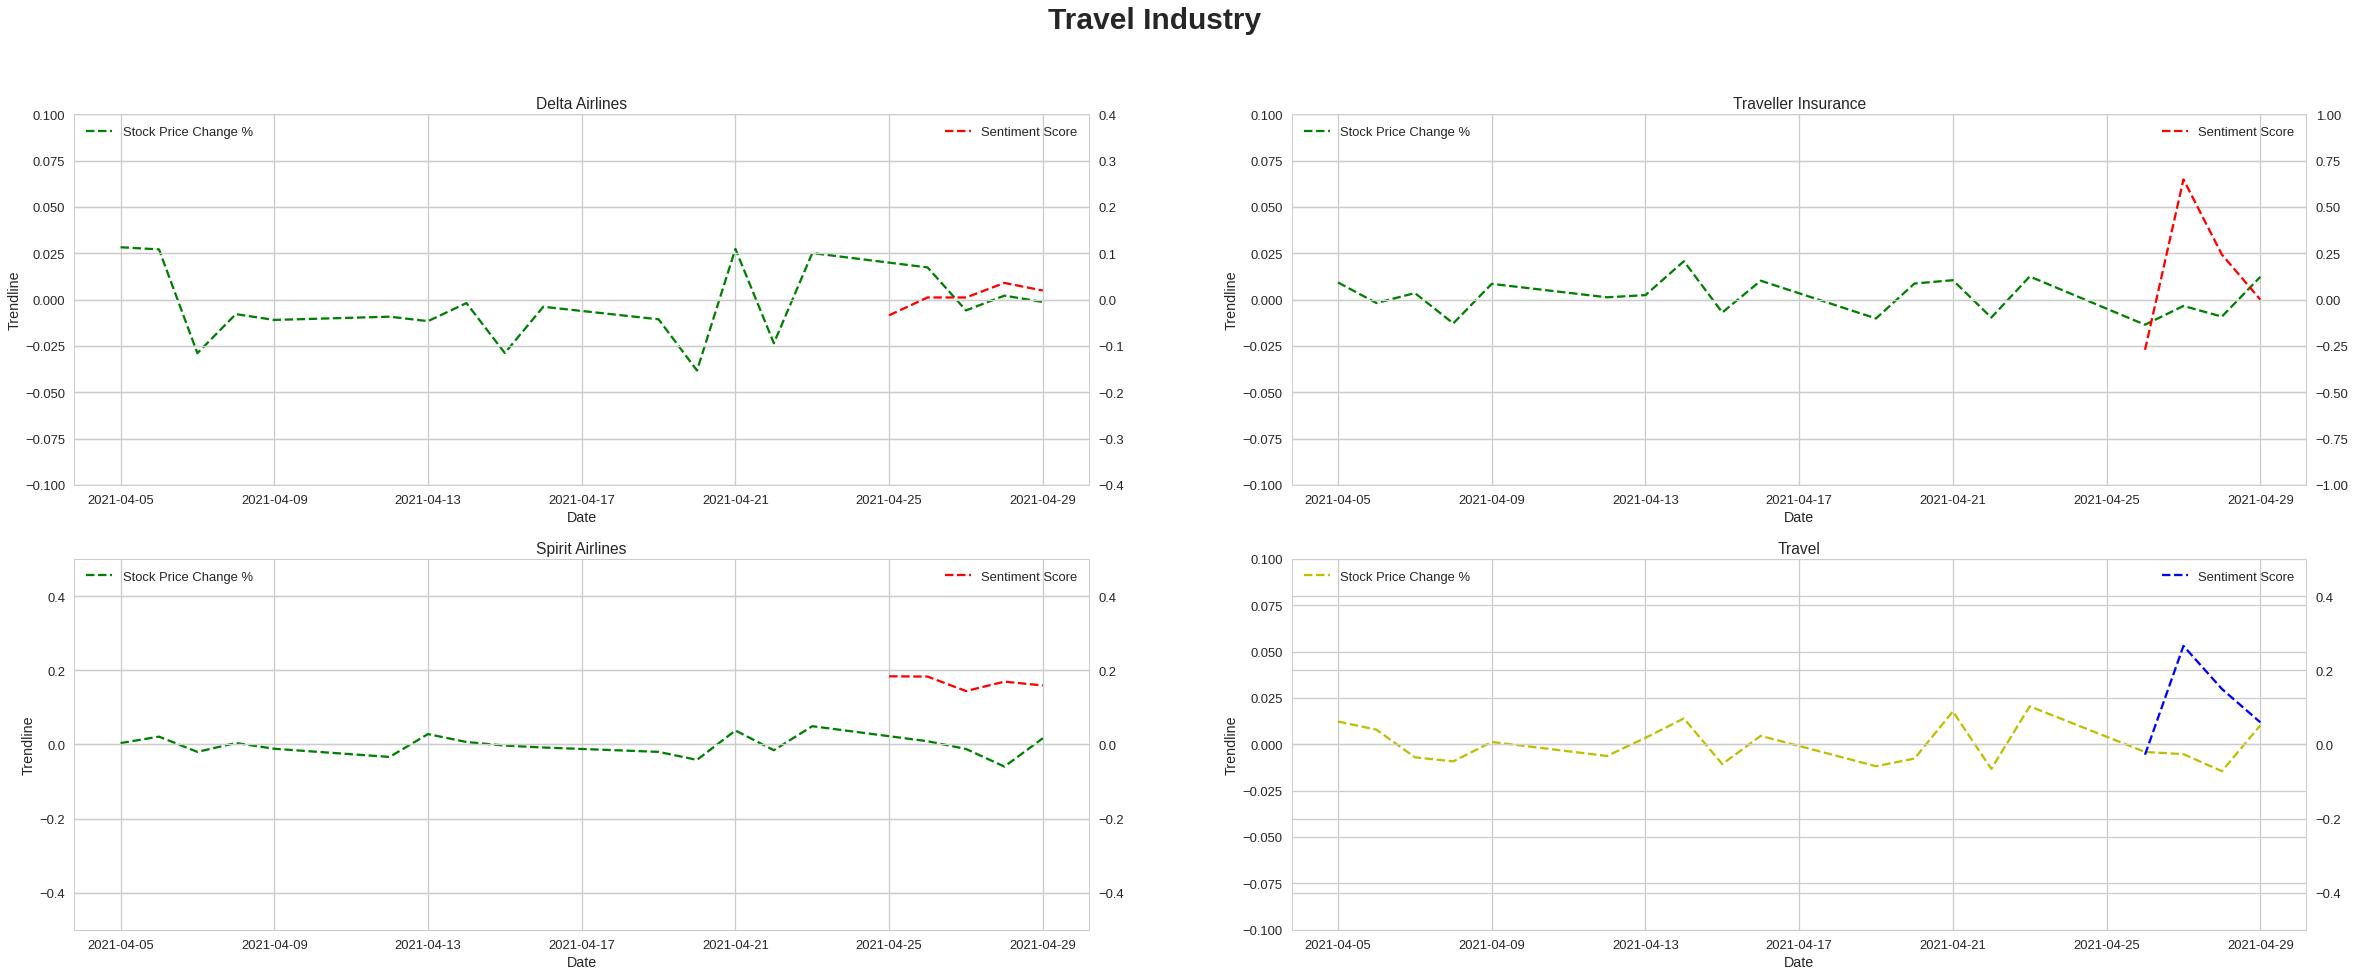

In [ ]:
import matplotlib.pyplot as plt

#Travel Industry

fig=plt.figure(figsize=(40,15))
fig.suptitle('Travel Industry',fontsize=30,fontweight='bold')

df_dal=df_tweetavg[df_tweetavg['company']=='Delta airlines']
DAL=fig.add_subplot(2,2,1)
DAL.set_xlabel('Date')
DAL.set_ylabel('Trendline')
DAL.set_title('Delta Airlines')
#l1=DAL.plot(date_stock,df_stock['dal'],label="Stock Price")
#dal_p=DAL.twinx()
DAL.plot(date_stock,df_stock['dal(%)'],'g--',label="Stock Price Change %")
DAL.set_ylim(-0.1,0.1)
dal_senti=DAL.twinx()
dal_senti.plot(pd.DatetimeIndex(data=df_dal['new_date']),df_dal['sentiment_score'],'r--', label='Sentiment Score')
dal_senti.set_ylim(-0.4,0.4)
DAL.legend(loc='upper left')
dal_senti.legend(loc='upper right')


df_trv=df_tweetavg[df_tweetavg['company']=='Traveller insurance']
TRV=fig.add_subplot(2,2,2)
TRV.set_xlabel('Date')
TRV.set_ylabel('Trendline')
TRV.set_title('Traveller Insurance')
#TRV.plot(date_stock,df_stock['trv'])
#trv_p=TRV.twinx()
TRV.plot(date_stock,df_stock['trv(%)'],'g--',label="Stock Price Change %")
TRV.set_ylim(-0.1,0.1)
trv_senti=TRV.twinx()
trv_senti.plot(pd.DatetimeIndex(data=df_trv['new_date']),df_trv['sentiment_score'],'r--',label='Sentiment Score')
trv_senti.set_ylim(-1,1)
TRV.legend(loc='upper left')
trv_senti.legend(loc='upper right')


df_save=df_tweetavg[df_tweetavg['company']=='Spirit airlines']
SAVE=fig.add_subplot(2,2,3)
SAVE.set_xlabel('Date')
SAVE.set_ylabel('Trendline')
SAVE.set_title('Spirit Airlines')
#SAVE.plot(date_stock,df_stock['save'])
#save_p=SAVE.twinx()
SAVE.plot(date_stock,df_stock['save(%)'],'g--',label="Stock Price Change %")
SAVE.set_ylim(-0.5,0.5)
save_senti=SAVE.twinx()
save_senti.plot(pd.DatetimeIndex(data=df_save['new_date']),df_save['sentiment_score'],'r--',label='Sentiment Score')
save_senti.set_ylim(-0.5,0.5)
SAVE.legend(loc='upper left')
save_senti.legend(loc='upper right')

Travel=fig.add_subplot(2,2,4)
Travel.set_xlabel('Date')
Travel.set_ylabel('Trendline')
Travel.set_title('Travel')
Travel.plot(date_stock,df_stock['Travel(%)'],'y--',label="Stock Price Change %")
Travel.set_ylim(-0.1,0.1)
#plot between industry average sentiment and date
dates_intersected = set(df_trv['new_date']) & set(df_save['new_date']) & set(df_dal['new_date'])
dates_intersected = np.array(sorted(dates_intersected))
sentiment_average = [np.mean([df.loc[df['new_date']==date, 'sentiment_score'] for df in [df_trv, df_save, df_dal]]) for date in dates_intersected]

travel_senti=Travel.twinx()
travel_senti.plot(pd.DatetimeIndex(data=dates_intersected),sentiment_average,'b--',label='Sentiment Score')
travel_senti.set_ylim(-0.5,0.5)
Travel.legend(loc='upper left')
travel_senti.legend(loc='upper right')
#trv_senti.set_ylim(-0.8,0.8)
#save_senti.set_ylim(-0.8,0.8)
#dal_senti.set_ylim(-0.8,0.8)




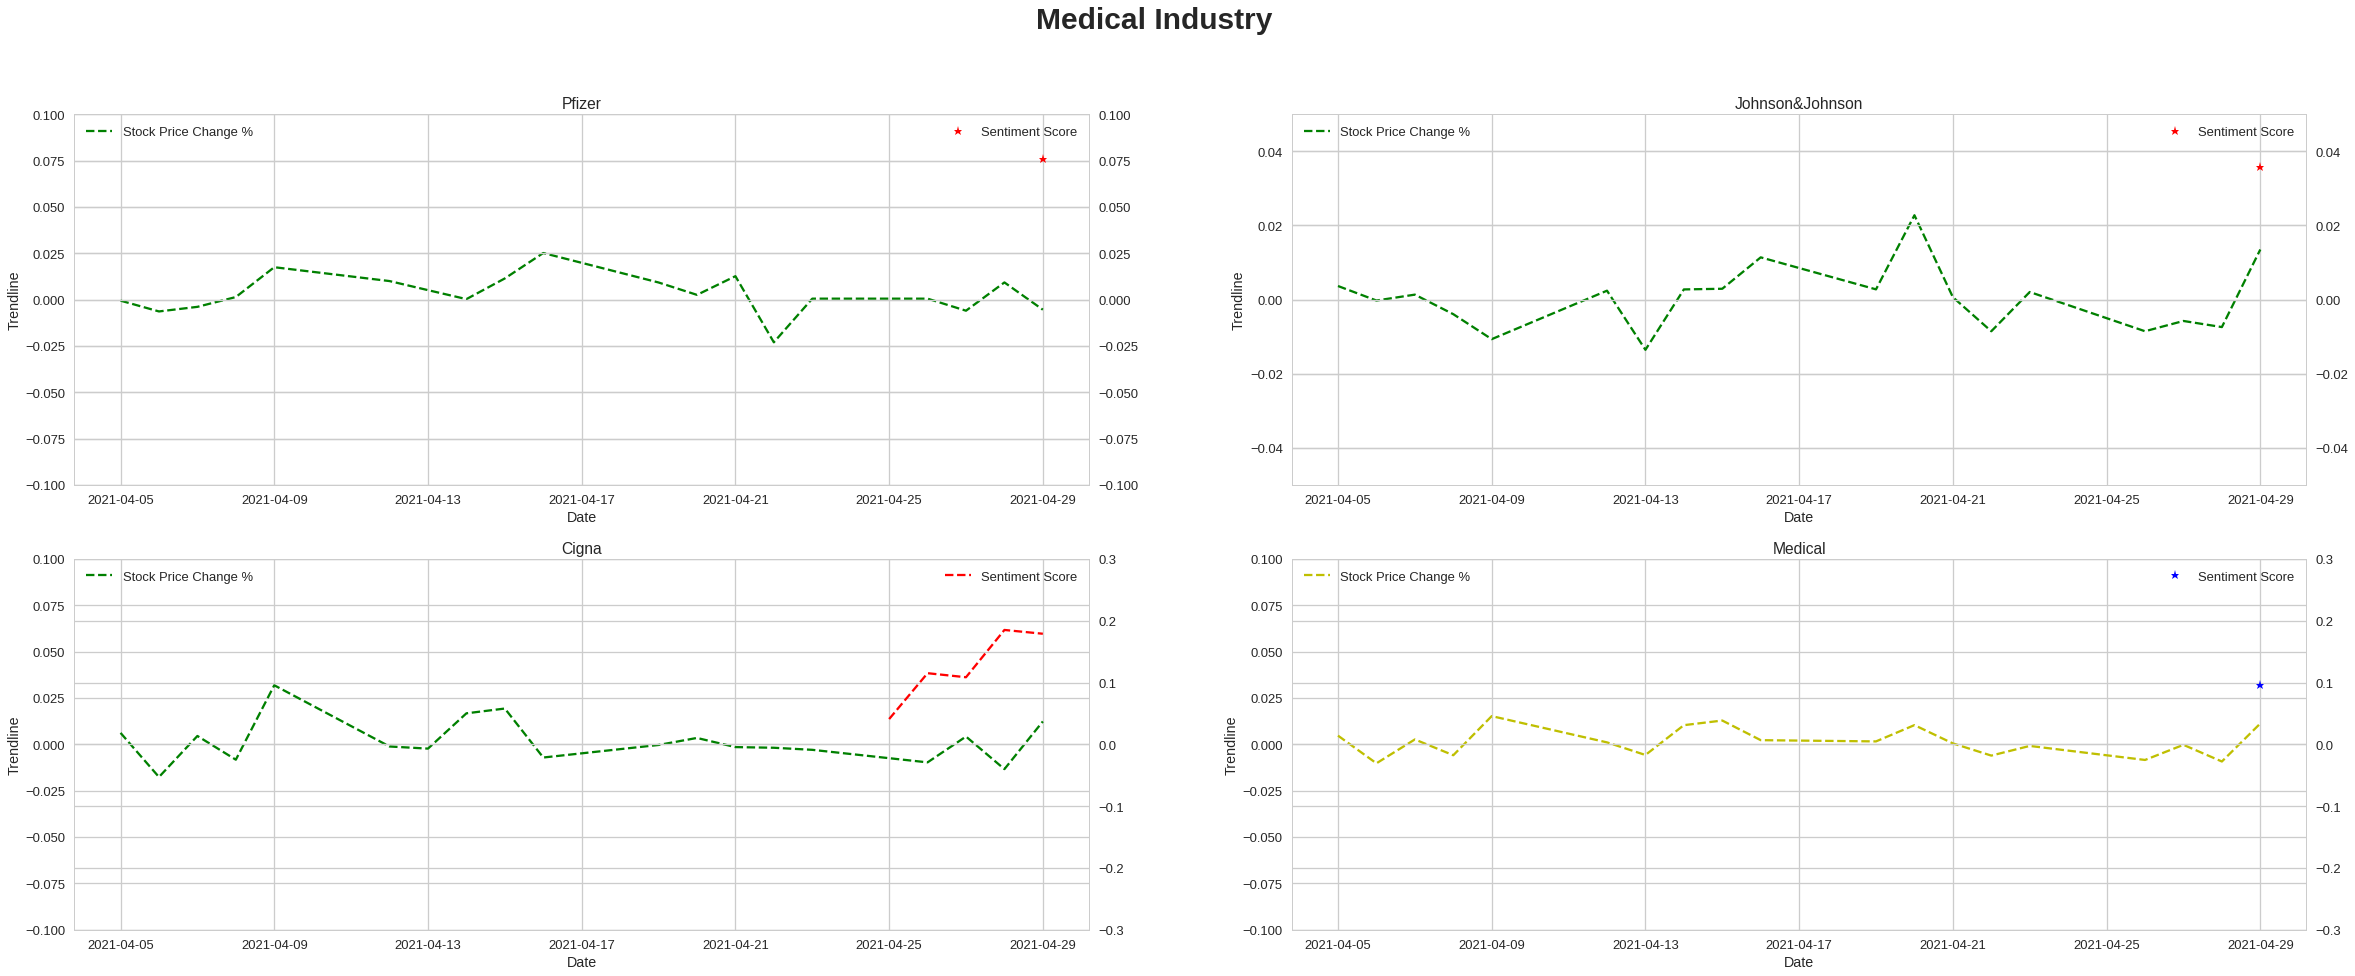

In [ ]:

#Medical
fig=plt.figure(figsize=(40,15))
fig.suptitle('Medical Industry',fontsize=30,fontweight='bold')


df_pfe=df_tweetavg[df_tweetavg['company']=='Pfizer']
PFE=fig.add_subplot(2,2,1)
PFE.set_xlabel('Date')
PFE.set_ylabel('Trendline')
PFE.set_title('Pfizer')
#PFE.plot(date_stock,df_stock['pfe'])
#pfe_p=PFE.twinx()
PFE.plot(date_stock,df_stock['pfe(%)'],'g--',label="Stock Price Change %")
PFE.set_ylim(-0.1,0.1)
pfe_senti=PFE.twinx()
pfe_senti.plot(pd.DatetimeIndex(data=df_pfe['new_date']),df_pfe['sentiment_score'],'r*',label='Sentiment Score')
pfe_senti.set_ylim(-0.1,0.1)
PFE.legend(loc='upper left')
pfe_senti.legend(loc='upper right')

df_jnj=df_tweetavg[df_tweetavg['company']=='Johnson & Johnson']
JNJ=fig.add_subplot(2,2,2)
JNJ.set_xlabel('Date')
JNJ.set_ylabel('Trendline')
JNJ.set_title('Johnson&Johnson')
#JNJ.plot(date_stock,df_stock['jnj'])
#jnj_p=JNJ.twinx()
JNJ.plot(date_stock,df_stock['jnj(%)'],'g--',label="Stock Price Change %")
JNJ.set_ylim(-0.05,0.05)
jnj_senti=JNJ.twinx()
jnj_senti.plot(pd.DatetimeIndex(data=df_jnj['new_date']),df_jnj['sentiment_score'],'r*',label='Sentiment Score')
jnj_senti.set_ylim(-0.05,0.05)
JNJ.legend(loc='upper left')
jnj_senti.legend(loc='upper right')

df_ci=df_tweetavg[df_tweetavg['company']=='Cigna']
CI=fig.add_subplot(2,2,3)
CI.set_xlabel('Date')
CI.set_ylabel('Trendline')
CI.set_title('Cigna')
#CI.plot(date_stock,df_stock['ci'])
#ci_p=CI.twinx()
CI.plot(date_stock,df_stock['ci(%)'],'g--',label="Stock Price Change %")
CI.set_ylim(-0.1,0.1)
ci_senti=CI.twinx()
ci_senti.plot(pd.DatetimeIndex(data=df_ci['new_date']),df_ci['sentiment_score'],'r--',label='Sentiment Score')
ci_senti.set_ylim(-0.3,0.3)
CI.legend(loc='upper left')
ci_senti.legend(loc='upper right')

Pharm=fig.add_subplot(2,2,4)
Pharm.set_xlabel('Date')
Pharm.set_ylabel('Trendline')
Pharm.set_title('Medical')
Pharm.plot(date_stock,df_stock['Pharmaceutical(%)'],'y--',label="Stock Price Change %")
Pharm.set_ylim(-0.1,0.1)
#plot between industry average sentiment and date
dates_intersected = set(df_pfe['new_date']) & set(df_jnj['new_date']) & set(df_ci['new_date'])
dates_intersected = np.array(sorted(dates_intersected))
sentiment_average = [np.mean([df.loc[df['new_date']==date, 'sentiment_score'] for df in [df_pfe, df_jnj, df_ci]]) for date in dates_intersected]

pharm_senti=Pharm.twinx()
pharm_senti.plot(pd.DatetimeIndex(data=dates_intersected),sentiment_average,'b*',label='Sentiment Score')
pharm_senti.set_ylim(-0.3,0.3)
Pharm.legend(loc='upper left')
pharm_senti.legend(loc='upper right')

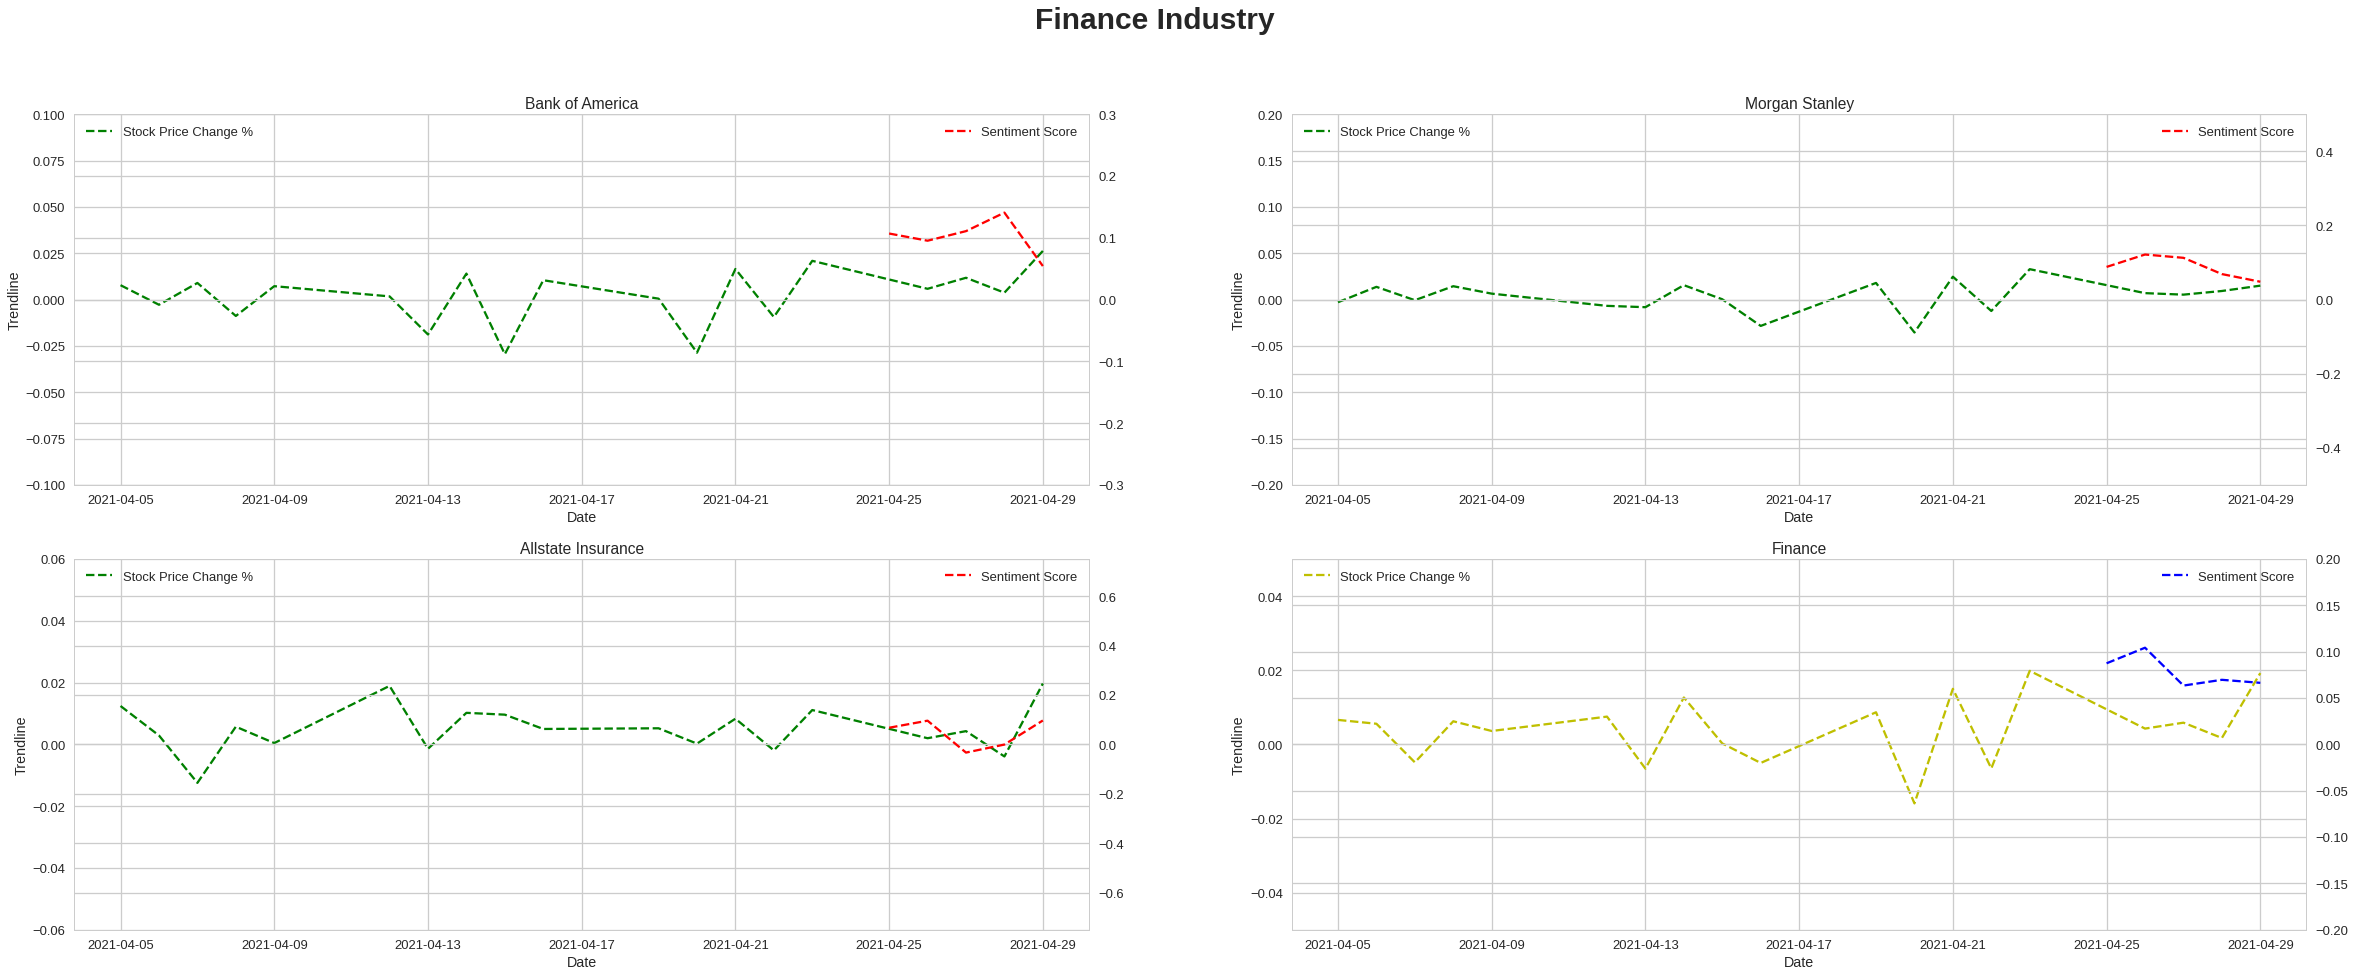

In [ ]:

#Finance
fig=plt.figure(figsize=(40,15))
fig.suptitle('Finance Industry',fontsize=30,fontweight='bold')

df_bac=df_tweetavg[df_tweetavg['company']=='Bank of America']
BAC=fig.add_subplot(2,2,1)
BAC.set_xlabel('Date')
BAC.set_ylabel('Trendline')
BAC.set_title('Bank of America')
#BAC.plot(date_stock,df_stock['bac'])
#bac_p=BAC.twinx()
BAC.plot(date_stock,df_stock['bac(%)'],'g--',label="Stock Price Change %")
BAC.set_ylim(-0.1,0.1)
bac_senti=BAC.twinx()
bac_senti.plot(pd.DatetimeIndex(data=df_bac['new_date']),df_bac['sentiment_score'],'r--',label='Sentiment Score')
bac_senti.set_ylim(-0.3,0.3)
BAC.legend(loc='upper left')
bac_senti.legend(loc='upper right')

df_ms=df_tweetavg[df_tweetavg['company']=='Morgan Stanley']
MS=fig.add_subplot(2,2,2)
MS.set_xlabel('Date')
MS.set_ylabel('Trendline')
MS.set_title('Morgan Stanley')
#MS.plot(date_stock,df_stock['ms'])
#ms_p=MS.twinx()
MS.plot(date_stock,df_stock['ms(%)'],'g--',label="Stock Price Change %")
MS.set_ylim(-0.2,0.2)
ms_senti=MS.twinx()
ms_senti.plot(pd.DatetimeIndex(data=df_ms['new_date']),df_ms['sentiment_score'],'r--',label='Sentiment Score')
ms_senti.set_ylim(-0.5,0.5)
MS.legend(loc='upper left')
ms_senti.legend(loc='upper right')

df_all=df_tweetavg[df_tweetavg['company']=='Allstate insurance']
ALL=fig.add_subplot(2,2,3)
ALL.set_xlabel('Date')
ALL.set_ylabel('Trendline')
ALL.set_title('Allstate Insurance')
#ALL.plot(date_stock,df_stock['all'])
#all_p=ALL.twinx()
ALL.plot(date_stock,df_stock['all(%)'],'g--',label="Stock Price Change %")
ALL.set_ylim(-0.06,0.06)
all_senti=ALL.twinx()
all_senti.plot(pd.DatetimeIndex(data=df_all['new_date']),df_all['sentiment_score'],'r--',label='Sentiment Score')
all_senti.set_ylim(-0.75,0.75)
ALL.legend(loc='upper left')
all_senti.legend(loc='upper right')

Finance=fig.add_subplot(2,2,4)
Finance.set_xlabel('Date')
Finance.set_ylabel('Trendline')
Finance.set_title('Finance')
Finance.plot(date_stock,df_stock['Financial_Service(%)'],'y--',label="Stock Price Change %")
Finance.set_ylim(-0.05,0.05)
#plot between industry average sentiment and date
dates_intersected = set(df_bac['new_date']) & set(df_ms['new_date']) & set(df_all['new_date'])
dates_intersected = np.array(sorted(dates_intersected))
sentiment_average = [np.mean([df.loc[df['new_date']==date, 'sentiment_score'] for df in [df_bac, df_ms, df_all]]) for date in dates_intersected]


Finance_senti=Finance.twinx()
Finance_senti.plot(pd.DatetimeIndex(data=dates_intersected),sentiment_average,'b--',label='Sentiment Score')
Finance_senti.set_ylim(-0.2,0.2)
Finance.legend(loc='upper left')
Finance_senti.legend(loc='upper right')

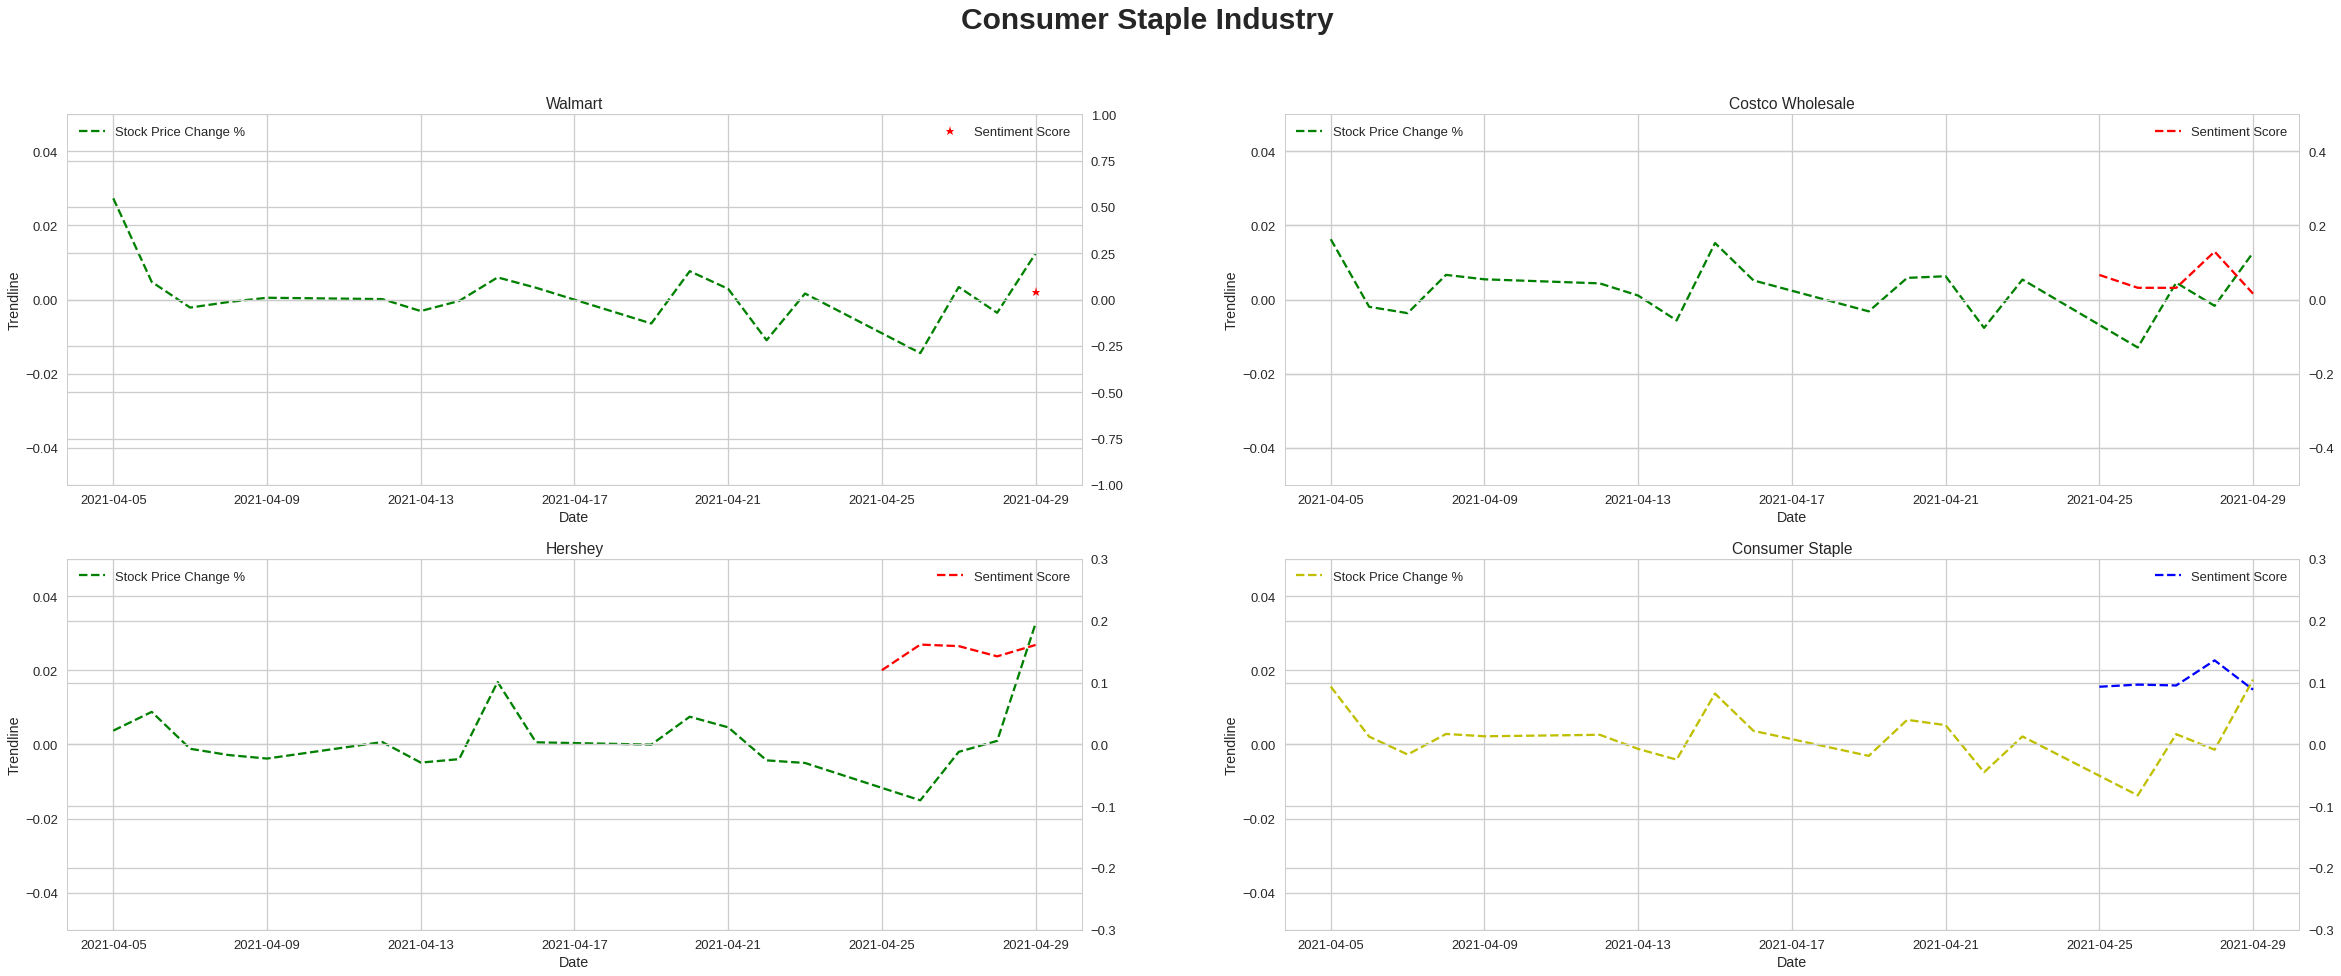

In [ ]:
#Consuming Staple
fig=plt.figure(figsize=(40,15))
fig.suptitle('Consumer Staple Industry',fontsize=30,fontweight='bold')

df_wmt=df_tweetavg[df_tweetavg['company']=='Walmart']
WMT=fig.add_subplot(2,2,1)
WMT.set_xlabel('Date')
WMT.set_ylabel('Trendline')
WMT.set_title('Walmart')
#WMT.plot(date_stock,df_stock['wmt'])
#wmt_p=WMT.twinx()
WMT.plot(date_stock,df_stock['wmt(%)'],'g--',label="Stock Price Change %")
WMT.set_ylim(-0.05,0.05)
wmt_senti=WMT.twinx()
wmt_senti.plot(pd.DatetimeIndex(data=df_wmt['new_date']),df_wmt['sentiment_score'],'r*',label='Sentiment Score')
wmt_senti.set_ylim(-1,1)
WMT.legend(loc='upper left')
wmt_senti.legend(loc='upper right')

df_cost=df_tweetavg[df_tweetavg['company']=='Costco wholesale']
COST=fig.add_subplot(2,2,2)
COST.set_xlabel('Date')
COST.set_ylabel('Trendline')
COST.set_title('Costco Wholesale')
#COST.plot(date_stock,df_stock['cost'])
#cost_p=COST.twinx()
COST.plot(date_stock,df_stock['cost(%)'],'g--',label="Stock Price Change %")
COST.set_ylim(-0.05,0.05)
cost_senti=COST.twinx()
cost_senti.plot(pd.DatetimeIndex(data=df_cost['new_date']),df_cost['sentiment_score'],'r--',label='Sentiment Score')
cost_senti.set_ylim(-0.5,0.5)
COST.legend(loc='upper left')
cost_senti.legend(loc='upper right')

df_hsy=df_tweetavg[df_tweetavg['company']=='Hershey']
HSY=fig.add_subplot(2,2,3)
HSY.set_xlabel('Date')
HSY.set_ylabel('Trendline')
HSY.set_title('Hershey')
#HSY.plot(date_stock,df_stock['hsy'])
#hsy_p=HSY.twinx()
HSY.plot(date_stock,df_stock['hsy(%)'],'g--',label="Stock Price Change %")
HSY.set_ylim(-0.05,0.05)
hsy_senti=HSY.twinx()
hsy_senti.plot(pd.DatetimeIndex(data=df_hsy['new_date']),df_hsy['sentiment_score'],'r--',label='Sentiment Score')
hsy_senti.set_ylim(-0.3,0.3)
HSY.legend(loc='upper left')
hsy_senti.legend(loc='upper right')

CS=fig.add_subplot(2,2,4)
CS.set_xlabel('Date')
CS.set_ylabel('Trendline')
CS.set_title('Consumer Staple')
CS.plot(date_stock,df_stock['Consumer_Staple(%)'],'y--',label="Stock Price Change %")
CS.set_ylim(-0.05,0.05)

#plot between industry average sentiment and date
#dates_intersected = set(df_wmt['new_date']) & set(df_cost['new_date']) & set(df_hsy['new_date'])
dates_intersected = set(df_cost['new_date']) & set(df_hsy['new_date'])
dates_intersected = np.array(sorted(dates_intersected))
sentiment_average = [np.mean([df.loc[df['new_date']==date, 'sentiment_score'] for df in [ df_cost, df_hsy]]) for date in dates_intersected]

CS_senti=CS.twinx()
CS_senti.plot(pd.DatetimeIndex(data=dates_intersected),sentiment_average,'b--',label='Sentiment Score')
CS_senti.set_ylim(-0.3,0.3)
CS.legend(loc='upper left')
CS_senti.legend(loc='upper right')

#Conclusion

With an intention to discover the relations between news sentiment and the according stock price change, we conduct the following steps:

1. Acquire the daily price of 12 stocks over 4 industries from 04-01-2021 to 04-30-2021
2. Access Twitter api and fetch relevant news for each stock, then compute sentiment score of the news of each stock on each specific day from 04-25-2021 to 04-30-2021 
3. Draw time-linegraphs that describe the relations among news sentiment score and stock price change, for both company level and industry level

As a result, we can conclude that most of those 12 companies' grapgh does not illustrate a strong relation between news sentiment and price change, only Delta Airlines, Spirit Airlines and Allstate demonstrate a positive correlation , and that is, the higher the sentiment score is , the larger the stock price change will be. which means, when the level of positivity is higher, we should expect a larger volatility on stock price. 

For Traveling Industry, where the data availbility is the strongest, we can trace a very clear positive coorelationship between the news sentiment scores and the stock price changes. For Finance industry, there is a possible time-lag between the news and the price change. For the others, they do not express a causality between the news sentiment scores and price flutuations due to the lack of data. 

The most significant reason why the other conclusions are not strong is the limitation of the sample size,  the number of news data on Twitter can only be traced back to last 7 days, which is far less enough for conducting a serious analysis, for instance, we can collect only one day news data for Walmart. 

But there is still ways to better our analysis, which can be:
1. Wider data avalability: Increase the number of stocks in our sample pool to compensate the loss of dates, and pick well-known companies to increase the avalability of news data. Indeed, we can also collect more news data accross more news platforms to conduct the sentiment analysis. 
2. Transfer sentiment score into its according absolute value, since we would also like to analyze how can the level of news' both negativity and positivity influence the stock price

To summarize, we've learnt a lot during this project by exploring different approaches to manipulate and present data. Big thanks to our cooperative teammates. Big thanks for Professor Norman White and TA Ethan Bai for all the instructions and guidances.








# ER Diagram

We store the stock price data in the stock_text table, and store the tweet sentiment score data in the tweet_semtiment table.

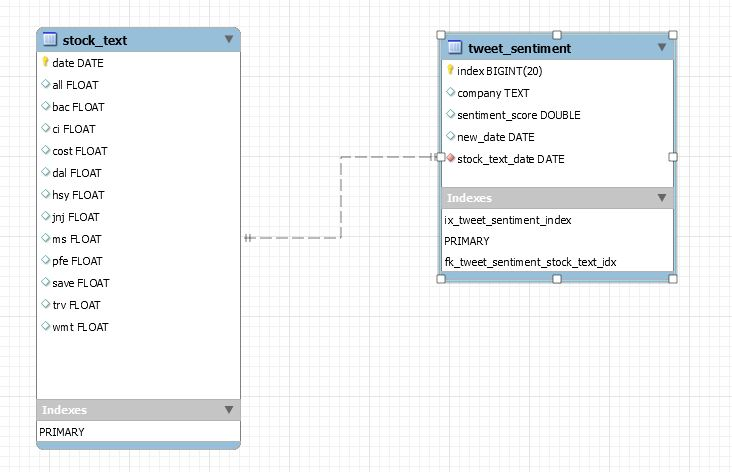